<a href="https://colab.research.google.com/github/21Siddhantjain/Bank_Personal_Loan_ML_Model/blob/master/Bank_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Import the datasets and libraries, check datatype, statistical summary, shape, null values etc
-----------------------------

In [96]:
import pandas as pd   #importing pandas
import numpy as np    #importing numpy
import seaborn as sns   #importing seaborn
import matplotlib.pyplot as plt   #importing matplotlib
from sklearn.model_selection import train_test_split    #importing testing and spliting function from sklearn

In [97]:
# Reading data from excel file
bank_data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx')
# printing first 5 values
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [98]:
# getting shape of data (rows and columns)
bank_data.shape

(5000, 14)

In [99]:
bank_data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [100]:
# Checking null values
bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

2.Check if you need to clean the data for any of the variables
-------------------------

In [101]:
bank_data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [102]:
# Changing following variables to category type
var=['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']
bank_data[var]=bank_data[var].astype('category')
bank_data.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

3.EDA: Study the data distribution in each attribute and target variable, share your findings.
-----------------------------

In [103]:
# Number of unique in each column ?
bank_data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [104]:
# Number of people with zero mortgage?
(bank_data['Mortgage'] == 0).sum()

3462

In [105]:
# Number of people with zero credit card spending per month?
(bank_data['CreditCard'] == 0).sum()

3530

In [106]:
# Value counts of all categorical columns.
(bank_data.dtypes == 'category').value_counts()

True     7
False    7
dtype: int64

Univariate and Bivariate analysis

Family            1     2    3     4
Personal Loan                       
0              1365  1190  877  1088
1               107   106  133   134


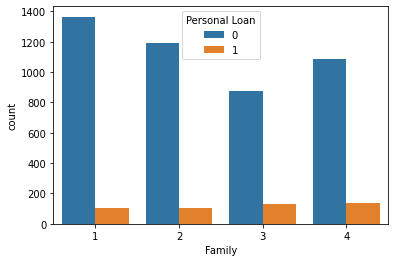

In [107]:
#Family
print(pd.pivot_table(data=bank_data,index='Personal Loan',columns='Family',aggfunc='size'))
sns.countplot(x='Family',data=bank_data,hue='Personal Loan')

Education         1     2     3
Personal Loan                  
0              2003  1221  1296
1                93   182   205


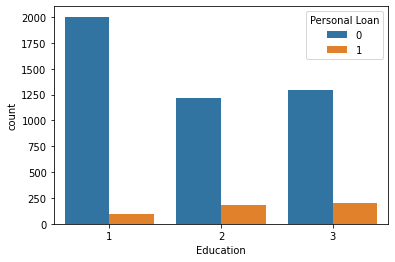

In [108]:
#Education
print(pd.pivot_table(data=bank_data,index='Personal Loan',columns='Education',aggfunc='size'))
sns.countplot(x='Education',data=bank_data,hue='Personal Loan')

0    4520
1     480
Name: Personal Loan, dtype: int64


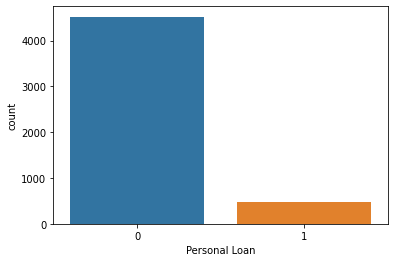

In [109]:
#Personal Loan
print(bank_data['Personal Loan'].value_counts())
sns.countplot(x='Personal Loan',data=bank_data)

Securities Account     0    1
Personal Loan                
0                   4058  462
1                    420   60


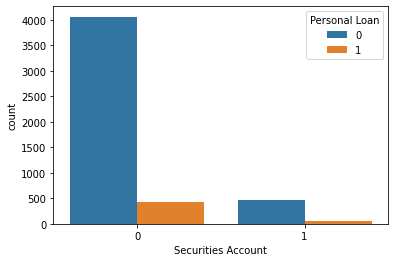

In [110]:
#Securities Account
print(pd.pivot_table(data=bank_data,index='Personal Loan',columns='Securities Account',aggfunc='size'))
sns.countplot(x='Securities Account',data=bank_data,hue='Personal Loan')

CD Account        0    1
Personal Loan           
0              4358  162
1               340  140


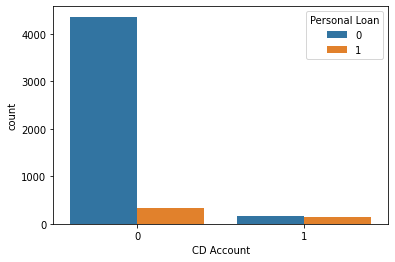

In [111]:
#CD Account
print(pd.pivot_table(data=bank_data,index='Personal Loan',columns='CD Account',aggfunc='size'))
sns.countplot(x='CD Account',data=bank_data,hue='Personal Loan')

Online            0     1
Personal Loan            
0              1827  2693
1               189   291


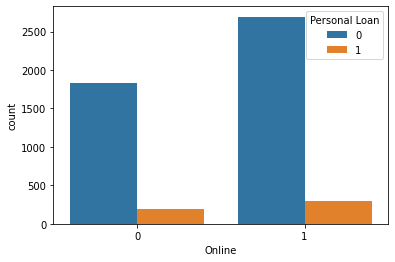

In [112]:
#Online
print(pd.pivot_table(data=bank_data,index='Personal Loan',columns='Online',aggfunc='size'))
sns.countplot(x='Online',data=bank_data,hue='Personal Loan')

CreditCard        0     1
Personal Loan            
0              3193  1327
1               337   143


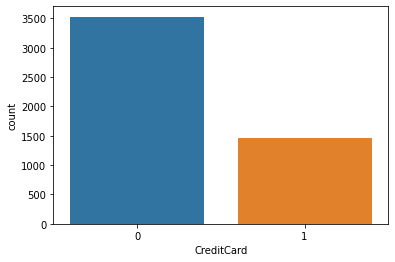

In [113]:
#CreditCard
print(pd.pivot_table(data=bank_data,index='Personal Loan',columns='CreditCard',aggfunc='size'))
sns.countplot(x='CreditCard',data=bank_data)

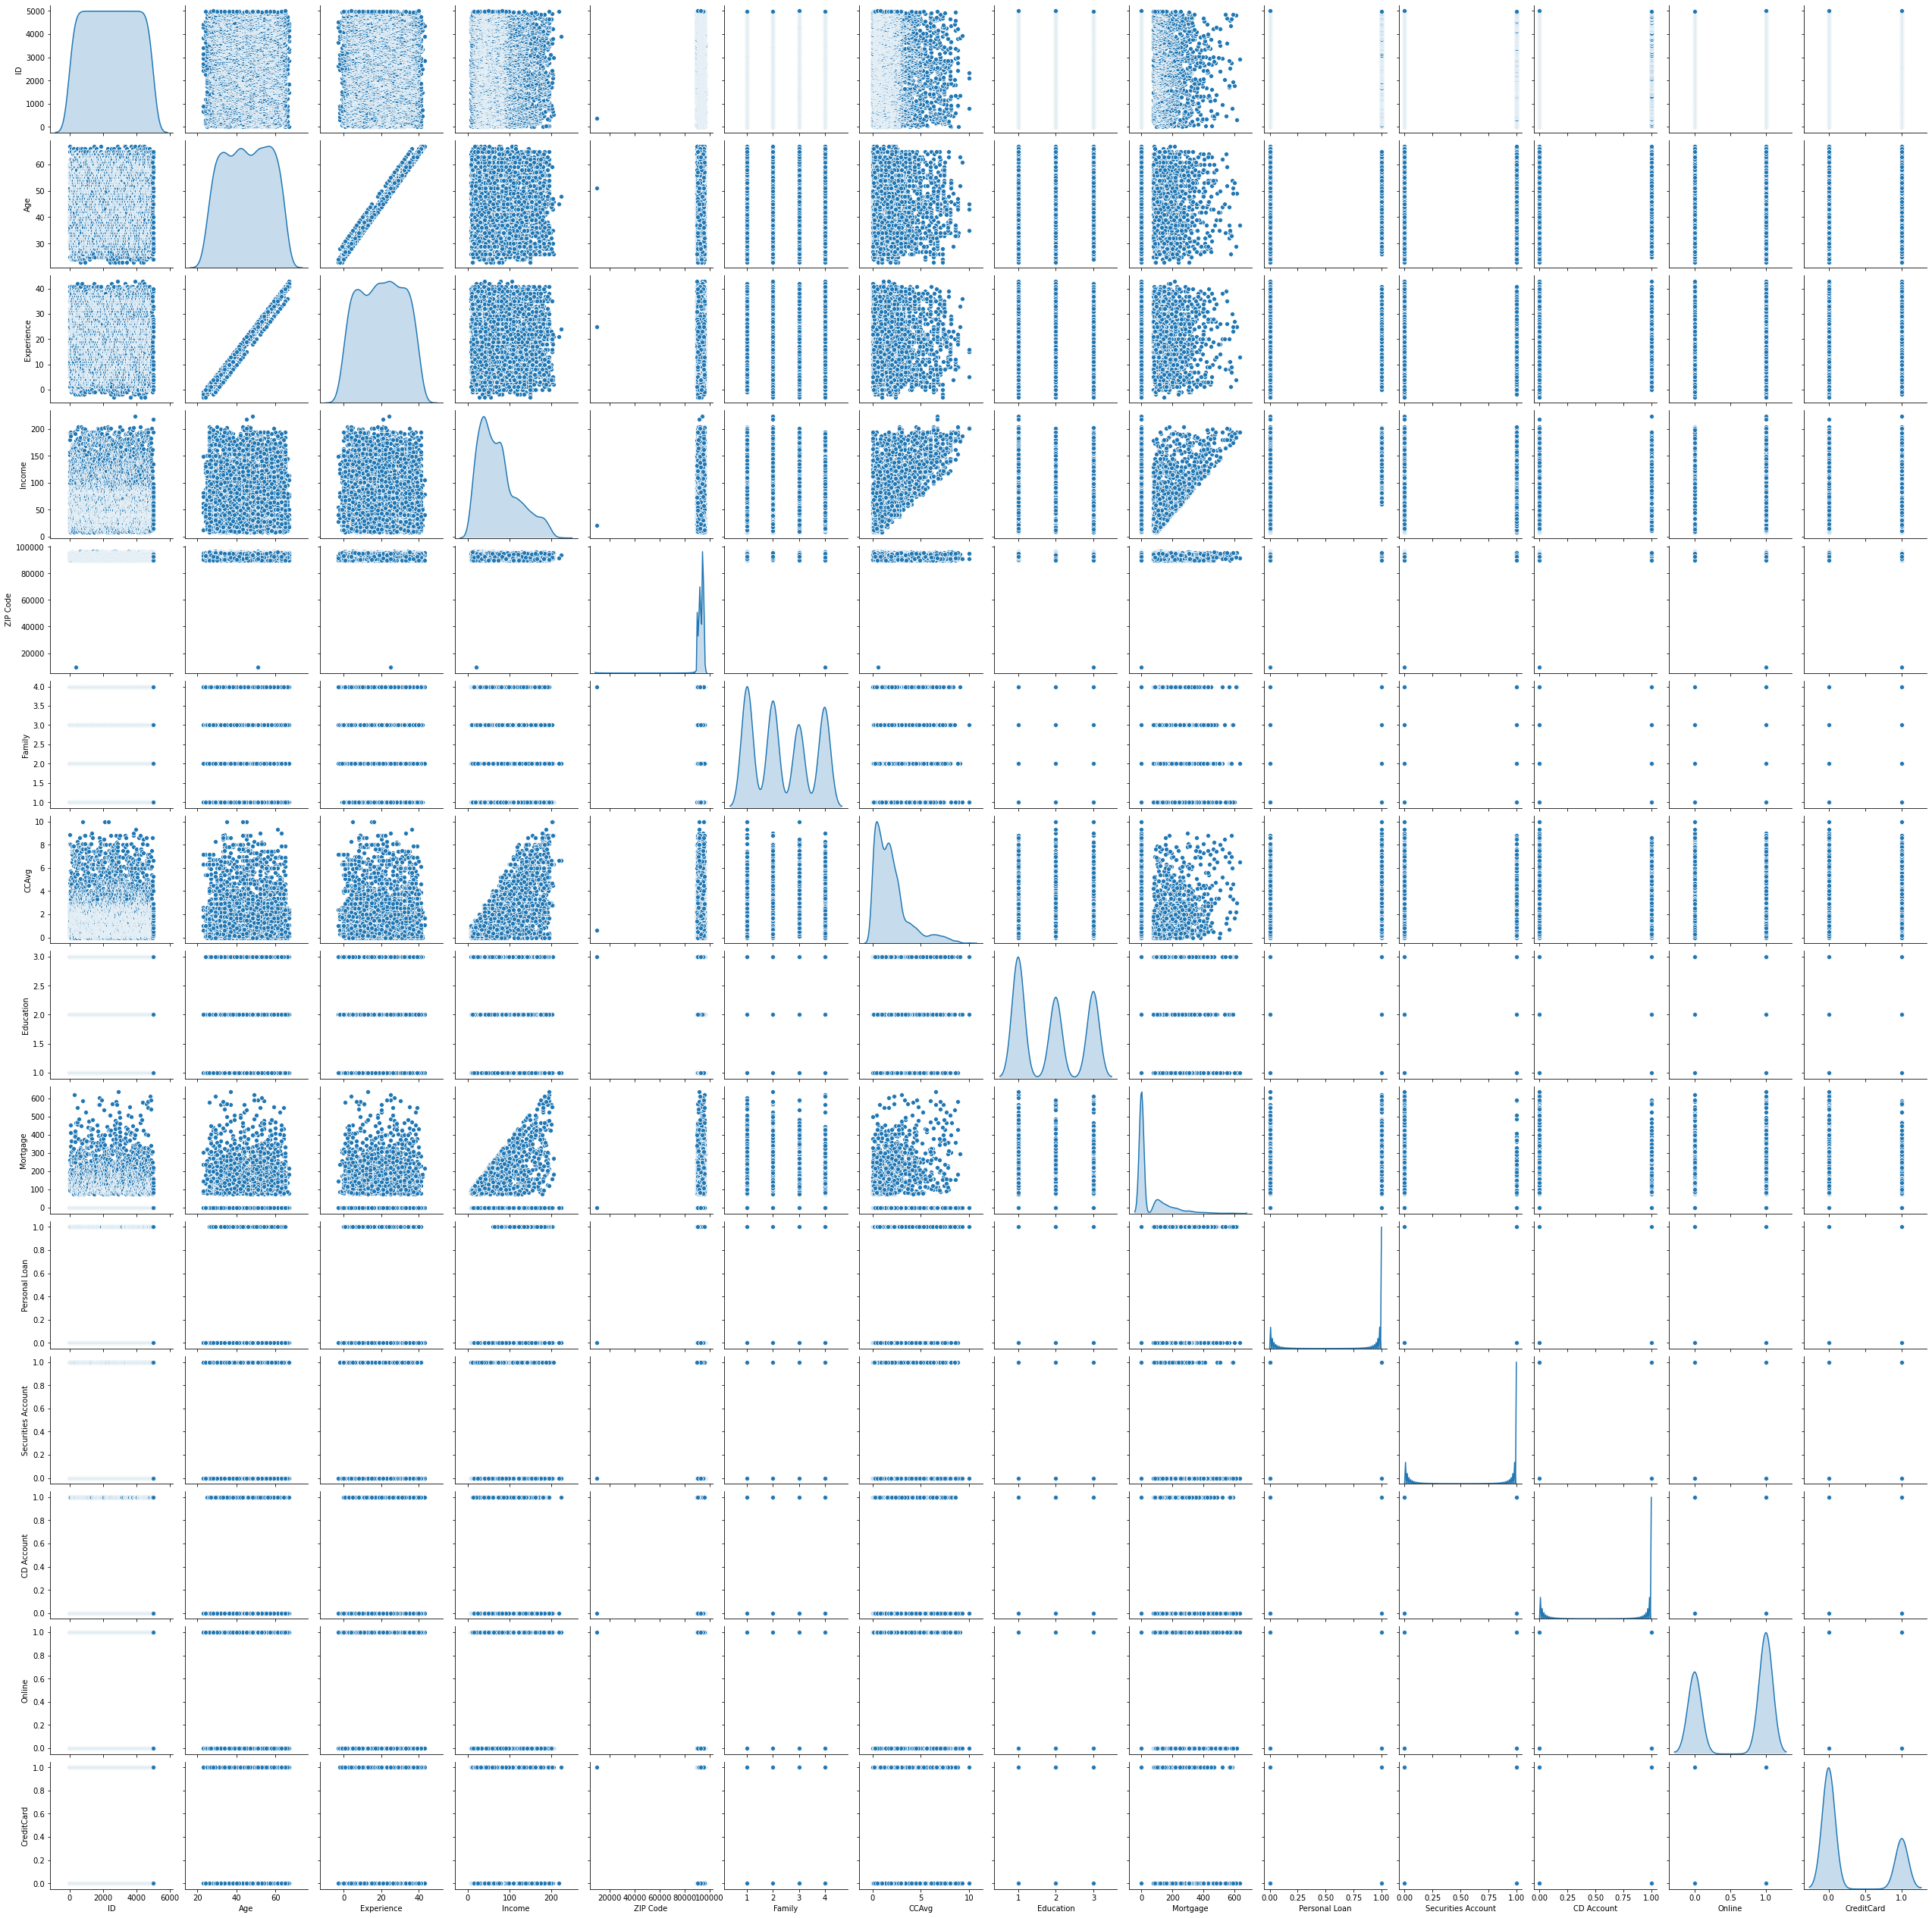

In [114]:
#plt.figure(figsize = (20,20))
sns.pairplot(bank_data,diag_kind='kde')

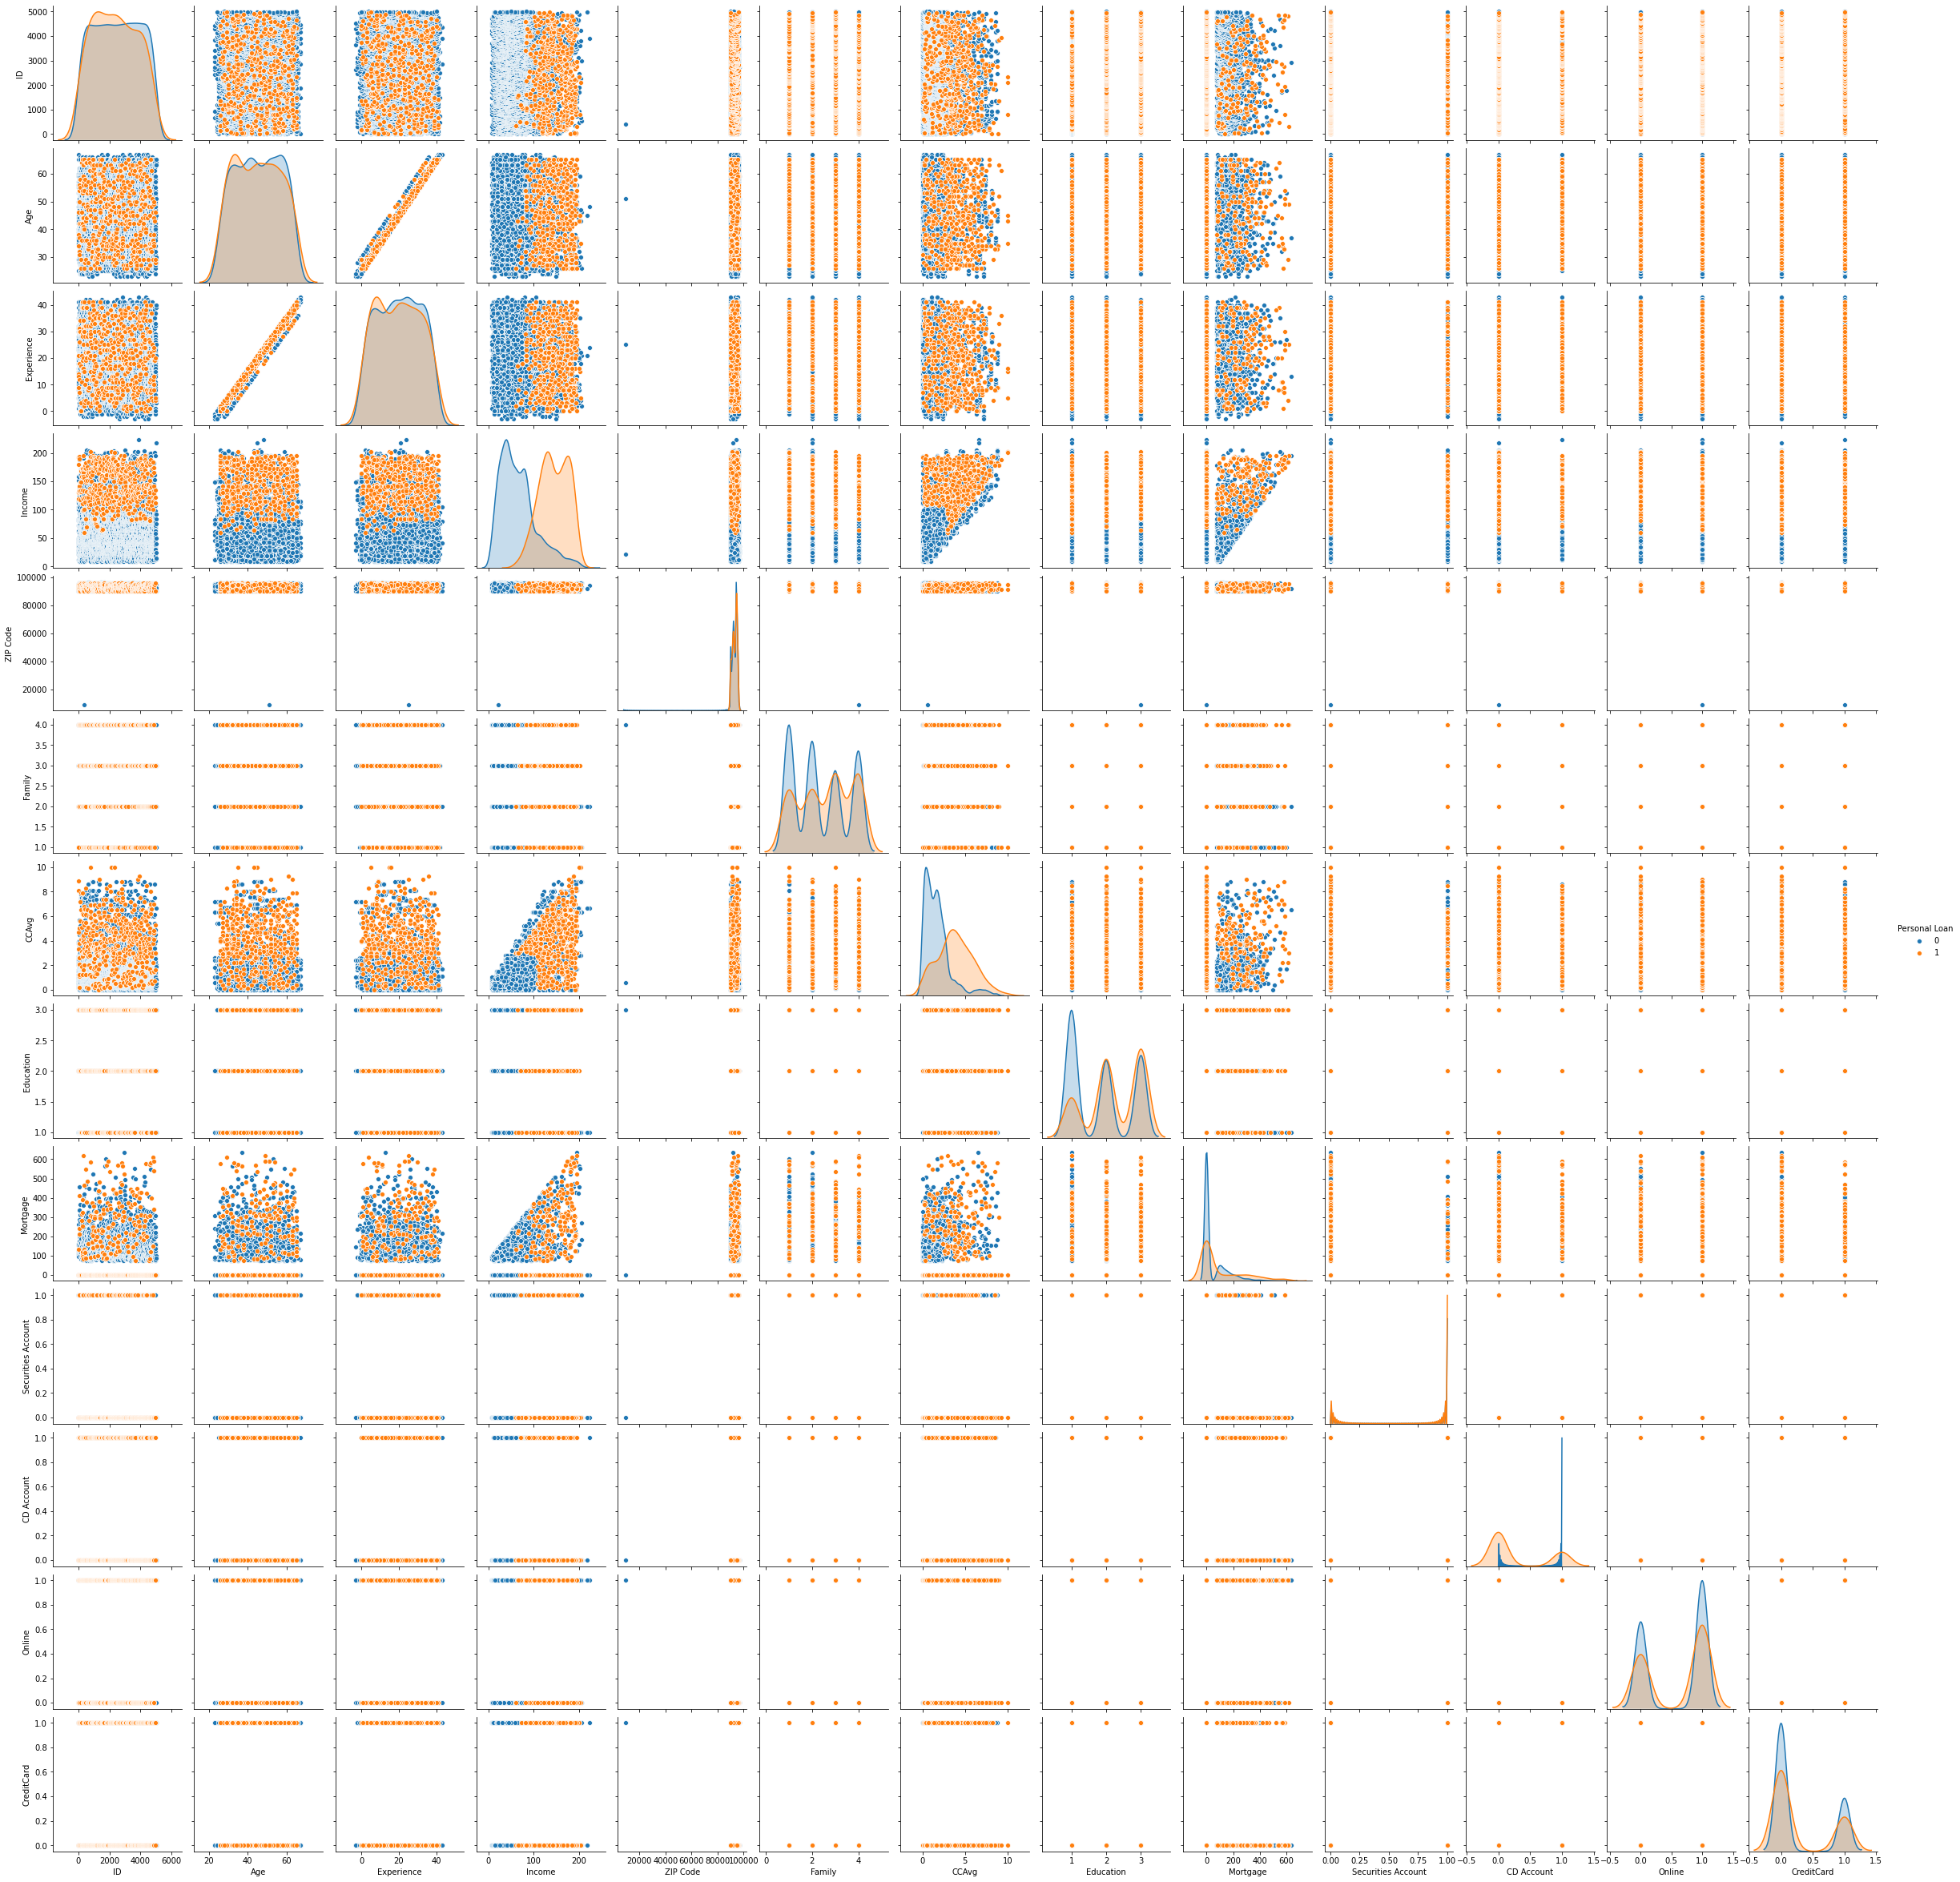

In [115]:
#plt.figure(figsize = (20,20))
sns.pairplot(bank_data,diag_kind='kde',hue='Personal Loan')

In [116]:
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000


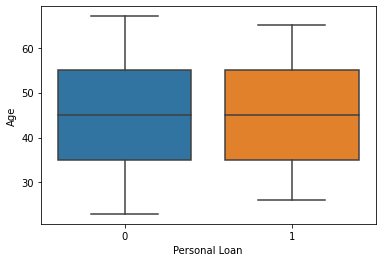

In [117]:
sns.boxplot(x='Personal Loan',y='Age',data=bank_data)

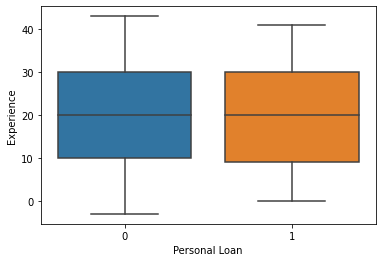

In [118]:
sns.boxplot(x='Personal Loan',y='Experience',data=bank_data)

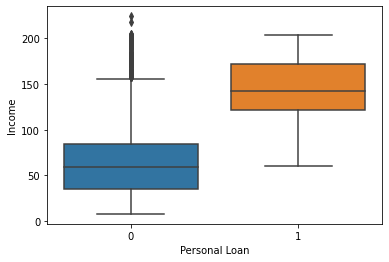

In [119]:
sns.boxplot(x='Personal Loan',y='Income',data=bank_data)

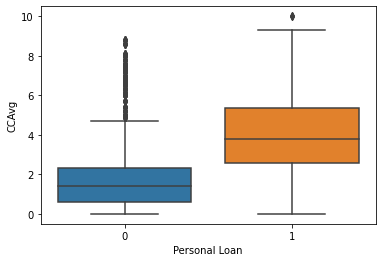

In [120]:
sns.boxplot(x='Personal Loan',y='CCAvg',data=bank_data)

4.Apply necessary transformations for the feature variables
--------------------------------

In [121]:
#1.We see -3 as experience, need to inspect these values.
#2.Income values are skewed.
#3.Mortgage col can be ignored as in most cases house is not mortgaged.
#4.Zip code is related to area, hence ignoring it for now
#5.Above a level og income people have taken personal loan, lower income group dont take a loan, so believe we can
#income.
#6.Data of personal loan is overlaped wrt to most variables.
#7.As per given statement only 480 took Personal Loan out of 5000, this is evident in the data.

In [122]:
#52 records have Experience less than zero, this is an error 
bank_data[bank_data['Experience']<0].shape

(52, 14)

In [123]:
#Taking absolute value of Experience column, to remove negative values
bank_data['Experience']=abs(bank_data['Experience'])
bank_data['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [124]:
#Age
print(pd.pivot_table(data=bank_data,index='Personal Loan',values='Age',aggfunc=['mean','median']))

                    mean median
                     Age    Age
Personal Loan                  
0              45.367257     45
1              45.066667     45


In [125]:
#Experience
print(pd.pivot_table(data=bank_data,index='Personal Loan',values='Experience',aggfunc=['mean','median']))

                    mean     median
              Experience Experience
Personal Loan                      
0              20.165487         20
1              19.843750         20


In [126]:
#Income, it shows variation to those who took personal loan and those who do not. 
print(pd.pivot_table(data=bank_data,index='Personal Loan',values='Income',aggfunc=['mean','median']))

                     mean median
                   Income Income
Personal Loan                   
0               66.237389   59.0
1              144.745833  142.5


In [127]:
#CCAvg, CCAvg spend is higher incase of personal Loan takers.
print(pd.pivot_table(data=bank_data,index='Personal Loan',values='CCAvg',aggfunc=['mean','median']))

                   mean median
                  CCAvg  CCAvg
Personal Loan                 
0              1.728982    1.4
1              3.905347    3.8


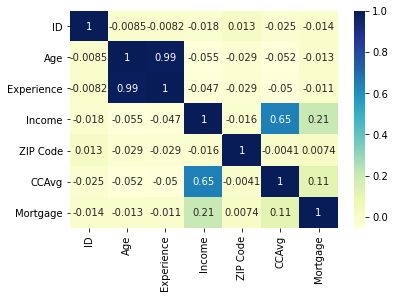

In [128]:
bank_corr=bank_data.corr()
sns.heatmap(bank_corr,cmap="YlGnBu",annot=True)

In [129]:
#Experience and age have very high correlation value, which is expected. 
#Income and CCAvg spend also have a strong correlation value.
bank_data.groupby(['Personal Loan']).agg(['mean','median'])

ID                Age  ...  CCAvg    Mortgage       
                      mean  median       mean  ... median        mean median
Personal Loan                                  ...                          
0              2512.165487  2518.5  45.367257  ...    1.4   51.789381      0
1              2390.650000  2342.0  45.066667  ...    3.8  100.845833      0

[2 rows x 14 columns]

In [130]:
bank_data.groupby(['Personal Loan']).agg(['min','max'])

ID       Age     Experience  ... ZIP Code CCAvg       Mortgage     
              min   max min max        min  ...      max   min   max      min  max
Personal Loan                               ...                                   
0               1  5000  23  67          0  ...    96651   0.0   8.8        0  635
1              10  4981  26  65          0  ...    96008   0.0  10.0        0  617

[2 rows x 14 columns]

5.Normalise your data and split the data into training and test set in the ratio of 70:30 respectively
---------------------------------

In [131]:
Y = bank_data['Personal Loan']
X = bank_data.drop(['Personal Loan'],1)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(['ID','ZIP Code','Experience'],axis=1), Y, train_size=0.7, test_size=0.3, random_state=100)

In [133]:
X_train.dtypes

Age                      int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

6.Use the Logistic Regression model to predict the likelihood of a customer buying personal loans.
----------------------------

In [134]:
# Importing LogisticRegression function from sklearn library
from sklearn.linear_model import LogisticRegression

# Importing metrics function from sklearn
from sklearn import metrics

logisticModel = LogisticRegression(max_iter=1000)
logisticModel.fit(X_train, y_train) # training model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
y_pred = logisticModel.predict(X_test) # testing the model
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticModel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


7.Print all the metrics related for evaluating the model performance 
-------------------------------------------------------

In [136]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1323   19]
 [  69   89]]


Accuracy of logistic regression classifier on test set: 92.80%
Misclassification Rate: It is often wrong: 7.20%
Sensitivity: When its actually yes how often it predicts yes: 43.67%
Specificity: When its actually no, how often does it predict no: 98.58%
Precision: When it predicts yes, how often is it correct: 78.41%


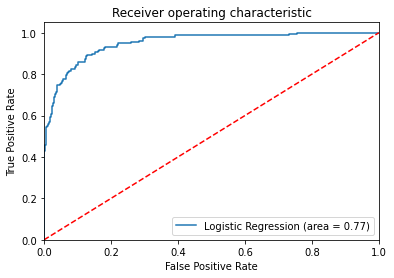

In [148]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=69
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1323
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=19
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=89
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logisticModel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticModel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1342
           1       0.82      0.56      0.67       158

    accuracy                           0.94      1500
   macro avg       0.89      0.77      0.82      1500
weighted avg       0.94      0.94      0.94      1500



In [139]:
y_pred_1 = pd.DataFrame(y_pred)
y_pred_1.head()

,0
0,0
1,0
2,0
3,0
4,0


8.Build various other classification algorithms and compare their performance
-------------------------

KNN Classifier
-----------------

In [140]:
# Importing KNN function from sklearn
from sklearn.neighbors import KNeighborsClassifier
# Using X_train dataframe as it was final data after cleaning, apply scaling and splitting
# Call Nearest Neighbour algorithm, keeping number of neighbours as 9
NNH = KNeighborsClassifier(n_neighbors= 9 , weights = 'uniform' )
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [141]:
# For every test data point, predict it's label based on 9 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels_KNN = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9026666666666666

In [142]:
print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1303   39]
 [ 107   51]]


Accuracy of KNN classifier on test set: 94.00%
Misclassification Rate: It is often wrong: 6.00%
Sensitivity: When its actually yes how often it predicts yes: 67.72%
Specificity: When its actually no, how often does it predict no: 97.09%
Precision: When it predicts yes, how often is it correct: 73.29%


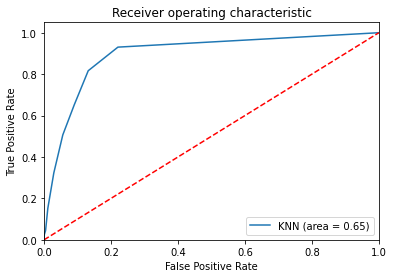

In [143]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=107
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1303
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=39
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=51

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of KNN classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
KNN_roc_auc = roc_auc_score(y_test, NNH.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NNH.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

Random Forest Classifier
--------------------------

In [144]:
# Importing Random Forest Classifier function from sklearn
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
RF_model = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')
# Fit on training data
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
predicted_labels_RF = RF_model.predict(X_test)
RF_model.score(X_test, y_test)

0.9846666666666667

In [146]:
print(metrics.confusion_matrix(y_test, predicted_labels_RF))

[[1338    4]
 [  19  139]]


Accuracy of Random Forest classifier on test set: 90.47%
Misclassification Rate: It is often wrong: 9.53%
Sensitivity: When its actually yes how often it predicts yes: 12.03%
Specificity: When its actually no, how often does it predict no: 99.70%
Precision: When it predicts yes, how often is it correct: 82.61%


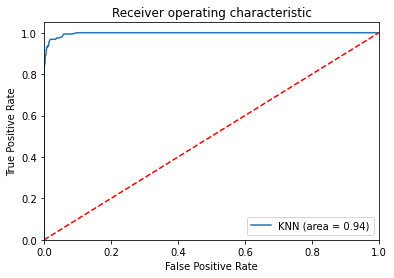

In [149]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=19
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1338
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=4
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=139

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of Random Forest classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
RF_roc_auc = roc_auc_score(y_test, RF_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RF_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

Logistic Regression
-------------------
Accuracy of logistic regression classifier on test set: 92.60%

Misclassification Rate: It is often wrong: 7.40%

Sensitivity: When its actually yes how often it predicts yes: 44.94%

Specificity: When its actually no, how often does it predict no: 98.21%

Precision: When it predicts yes, how often is it correct: 74.74%

KNN Classifier
--------------
Accuracy of KNN classifier on test set: 94.00%

Misclassification Rate: It is often wrong: 6.00%

Sensitivity: When its actually yes how often it predicts yes: 67.72%

Specificity: When its actually no, how often does it predict no: 97.09%

Precision: When it predicts yes, how often is it correct: 73.29%

Random Forest Classifier
-----------------------
Accuracy of Random Forest classifier on test set: 90.60%

Misclassification Rate: It is often wrong: 9.40%

Sensitivity: When its actually yes how often it predicts yes: 13.29%

Specificity: When its actually no, how often does it predict no: 99.70%

Precision: When it predicts yes, how often is it correct: 84.00%

9.Give a business understanding of your model
-------------------------------

This model will predict if a person will get personal loan or not by analysis previous data of people who got personal loan and those who did not get personal loan using different machine learning algorithms like Logistic Regression classifier, KNN classifier and Random Forest Classifier. Above are the testing accuraccy these algorithms gave us.
Different steps we took building this model :

1) Imported necessary libraries.

2) Imported the data set for analysis.

3) Checked if there are any null vales in the data set.

4) Changed the datatype of the columns to category with categorical values.

5) Univariate and bivariate analysis
- By analysis we filtered the necessary variables, which are highly corelated with personal loan and what variables are not related to peronal loan.
- ID, ZIP Code and Experience are not related enough with personal loan to take them into consideration and train the model with them.

6) After this we split the data 70% and 30%. 70% are for training and 30% are testing.

7) Implemented the logistic regression model using sklearn library

8) Evaluated performance using metric ans confusion matrix.

9) Built various models and chose models with best accuracies.
